In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load National Footprint Data
nf_csv_path = "Resources/NFA/NFA 2018.csv"
nf_df = pd.read_csv(nf_csv_path)
# Filters: 
# records keeping: BiocapTotGHA 
# records filter out: BiocapPerCap, EFConsPerCap/TotGHA, EFExportsPerCap/TotGHA, EFImportsPerCap/TotGHA, EFProdPerCap/TotGHA
nf_df = nf_df[nf_df['record'] == 'BiocapTotGHA']
nf_df.head()


,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,555812.9726,465763.3374,289190.6623,47320.22459,116139.5982,0.0,1474226.795,949.033,3449000
11,Armenia,ARM,Asia,Western Asia,1993,BiocapTotGHA,538659.0959,466181.5956,289695.8367,47293.87727,107720.2388,0.0,1449550.644,886.033,3370000
21,Armenia,ARM,Asia,Western Asia,1994,BiocapTotGHA,537897.6656,473441.0226,289832.8036,47206.96501,103552.5070,0.0,1451930.964,956.471,3290000
31,Armenia,ARM,Asia,Western Asia,1995,BiocapTotGHA,531812.0787,505784.7756,289527.2356,47069.84016,101521.3116,0.0,1475715.242,1043.540,3223000
41,Armenia,ARM,Asia,Western Asia,1996,BiocapTotGHA,612400.5242,538818.3582,289980.1739,47010.04117,112371.3847,0.0,1600580.482,1121.880,3173000


### Load DataFrame Meat Consumption

In [3]:
# Load FAO Meat Consumption Data (downloaded from OECD)
fao_mc_csv_path = "Resources/FAO/daily-protein-supply-from-animal-and-plant-based-foods.csv"
fao_mc_df = pd.read_csv(fao_mc_csv_path)
# Filter years
fao_mc_df = fao_mc_df[fao_mc_df['Year'] >= 1993]

### Scatter Plot

In [4]:
# merge dataframes (add GDP to fao_mc_df)
merged_mc_df = pd.merge(fao_mc_df, nf_df, how='left', left_on=['Code','Year'], right_on=['ISO alpha-3 code','year']).fillna(0)
# Filter out unused columns
merged_mc_df = merged_mc_df[['Entity','Code','Year','Daily protein supply of animal origin (g/person/day)', 'Percapita GDP (2010 USD)']]
# Filter out GDP values with 0 or negative
merged_mc_df = merged_mc_df[merged_mc_df['Percapita GDP (2010 USD)'] > 0]
merged_mc_df.head()

,Entity,Code,Year,Daily protein supply of animal origin (g/person/day),Percapita GDP (2010 USD)
9,Afghanistan,AFG,2002,14.26,364.571
10,Afghanistan,AFG,2003,13.22,376.759
11,Afghanistan,AFG,2004,13.35,364.095
12,Afghanistan,AFG,2005,13.02,389.416
13,Afghanistan,AFG,2006,11.28,397.986


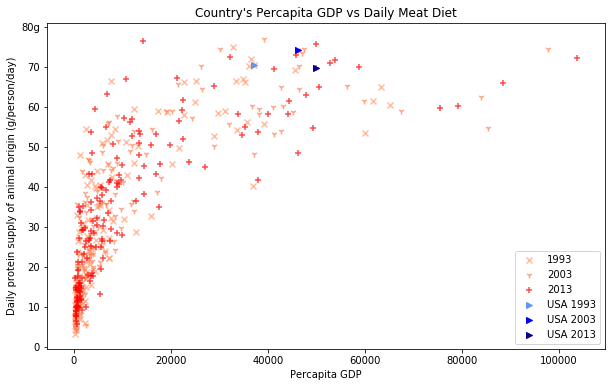

In [5]:
# Plot Scatter
# Set plots by years 1 decade apart
merged_mc1993_df = merged_mc_df[merged_mc_df['Year']==1993]
merged_mc2003_df = merged_mc_df[merged_mc_df['Year']==2003]
merged_mc2013_df = merged_mc_df[merged_mc_df['Year']==2013]
# Set x_axis & y_axis by Years
x_axis_1993 = merged_mc1993_df['Percapita GDP (2010 USD)']
y_axis_1993 = merged_mc1993_df['Daily protein supply of animal origin (g/person/day)']
x_axis_2003 = merged_mc2003_df['Percapita GDP (2010 USD)']
y_axis_2003 = merged_mc2003_df['Daily protein supply of animal origin (g/person/day)']
x_axis_2013 = merged_mc2013_df['Percapita GDP (2010 USD)']
y_axis_2013 = merged_mc2013_df['Daily protein supply of animal origin (g/person/day)']
# Set USA x_axis & y_axis
x_axis_1993_USA = merged_mc1993_df[merged_mc1993_df['Code'] == 'USA']['Percapita GDP (2010 USD)']
y_axis_1993_USA = merged_mc1993_df[merged_mc1993_df['Code'] == 'USA']['Daily protein supply of animal origin (g/person/day)']
x_axis_2003_USA = merged_mc2003_df[merged_mc2003_df['Code'] == 'USA']['Percapita GDP (2010 USD)']
y_axis_2003_USA = merged_mc2003_df[merged_mc2003_df['Code'] == 'USA']['Daily protein supply of animal origin (g/person/day)']
x_axis_2013_USA = merged_mc2013_df[merged_mc2013_df['Code'] == 'USA']['Percapita GDP (2010 USD)']
y_axis_2013_USA = merged_mc2013_df[merged_mc2013_df['Code'] == 'USA']['Daily protein supply of animal origin (g/person/day)']

# Plot scatters
plt.subplots(figsize=(10,6))
plt.scatter(x_axis_1993, y_axis_1993, alpha=0.7, label='1993', marker='x', color='lightsalmon')
plt.scatter(x_axis_2003, y_axis_2003, alpha=0.7, label='2003', marker='1', color='coral')
plt.scatter(x_axis_2013, y_axis_2013, alpha=0.7, label='2013', marker='+', color='red')
plt.scatter(x_axis_1993_USA, y_axis_1993_USA, alpha=1.0, label='USA 1993', marker='>', color='cornflowerblue')
plt.scatter(x_axis_2003_USA, y_axis_2003_USA, alpha=1.0, label='USA 2003', marker='>', color='blue')
plt.scatter(x_axis_2013_USA, y_axis_2013_USA, alpha=1.0, label='USA 2013', marker='>', color='darkblue')
# Set Labels
plt.title("Country's Percapita GDP vs Daily Meat Diet")
plt.xlabel('Percapita GDP')
plt.ylabel('Daily protein supply of animal origin (g/person/day)')
plt.yticks([0,10,20,30,40,50,60,70,80], ['0','10','20','30','40','50','60','70','80g'])
plt.legend(loc='lower right')
plt.savefig('img/Scatter_DPS_GFPvsDPS_Meat.png')
plt.show()


### Stack Plot

In [6]:
# Take the 2 top, middle, and bottom countries and store into country_obs_list (country observe list)
# Based on Daily Protein Supply of animal origin total from 1995-2013

# group by country, then store top, middle, bottom countries in country_list
code_grouped_fao_mc_df = fao_mc_df.groupby(['Entity'])
sorted_dps_meat = code_grouped_fao_mc_df.sum()['Daily protein supply of animal origin (g/person/day)'].sort_values(ascending=False)
country_total = sorted_dps_meat.count()
# Top 2
country_obs_list = [sorted_dps_meat.index[0], sorted_dps_meat.index[1]]
# Middle 2
for i in range(0,2):
    country_obs_list.append(sorted_dps_meat.index[int(country_total/2)+i])
# Bottom 2
country_obs_list.append(sorted_dps_meat.index[-3])
country_obs_list.append(sorted_dps_meat.index[-2])
country_obs_list

['Iceland', 'Hong Kong', 'Colombia', 'China', 'Malawi', 'Rwanda']

In [7]:
# Filter out fao_mc_df DataFrame to contain country_obs_list
code_fao_mc_df = fao_mc_df.set_index(['Entity'])
code_fao_mc_df = code_fao_mc_df.loc[country_obs_list]
fao_mc_df = code_fao_mc_df.reset_index()

In [8]:
# Add Daily Protien Supply Percentage
# group by year for year total
year_grouped_fao_mc_df = fao_mc_df.groupby(['Year'])
yearly_total_dps_meat = year_grouped_fao_mc_df.sum()['Daily protein supply of animal origin (g/person/day)']
yearly_total_dps_meat_df = pd.DataFrame(yearly_total_dps_meat)
# Rename Columns
yearly_total_dps_meat_df = yearly_total_dps_meat_df.reset_index()
yearly_total_dps_meat_df = yearly_total_dps_meat_df.rename(columns={'Daily protein supply of animal origin (g/person/day)':'DPS Meat total'})
# Add DPS Meat Total by Merged Data Frames 
fao_mc_df = pd.merge(fao_mc_df, yearly_total_dps_meat_df, how='left', left_on='Year', right_on='Year')
# Add Daily protein supply by meat percentage column
fao_mc_df['DPS Meat %'] = fao_mc_df['Daily protein supply of animal origin (g/person/day)'] / fao_mc_df['DPS Meat total']
fao_mc_df.head()


,Entity,Code,Year,Daily protein supply of animal origin (g/person/day),Daily protein supply of plant origin (g/person/day),DPS Meat total,DPS Meat %
0,Iceland,ISL,1993,81.71,34.43,195.77,0.417378
1,Iceland,ISL,1994,85.17,39.11,208.64,0.408215
2,Iceland,ISL,1995,77.83,41.53,210.67,0.369440
3,Iceland,ISL,1996,74.37,35.07,205.51,0.361880
4,Iceland,ISL,1997,79.41,35.01,213.22,0.372432


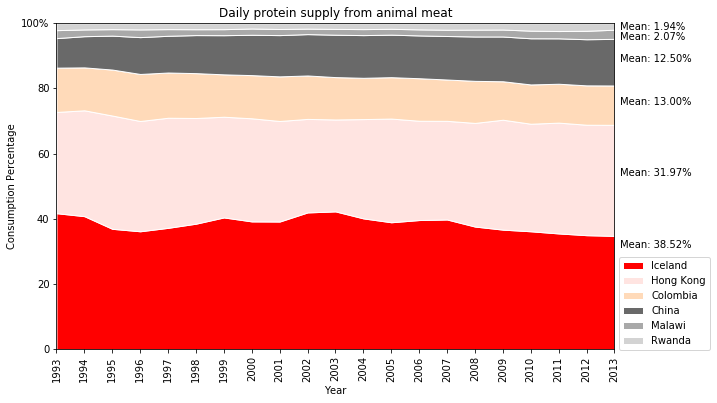

In [9]:
# Plot Stack based on 100% scale
x_axis = np.arange(1993,2014)
y_axis = []
colors = ['red','mistyrose','peachpuff', 'dimgrey','darkgrey','lightgrey']
country_mean = []
# Loop top 2, middle 2, bottom 2 & store data series of DPS Meat % in List
fig, ax = plt.subplots(figsize=(10,6))
for country in country_obs_list:
    country_dps = fao_mc_df[fao_mc_df['Entity'] == country]['DPS Meat %']
    y_axis.append(country_dps)
    country_mean.append("Mean: {0:.2f}%".format(country_dps.mean()*100))
    
# Plot Stackplot based off top 2, middle 2, bottom 2
ax.stackplot(x_axis, y_axis, labels=country_obs_list, colors=colors, edgecolor='white')
# Set Labels
plt.title('Daily protein supply from animal meat')
plt.xlabel('Year')
plt.ylabel('Consumption Percentage')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.14))
plt.xticks(x_axis, rotation=90)
plt.yticks([0,.2,.4,.6,.8,1], ['0','20','40','60','80','100%'])
plt.xlim(1993,2013)
plt.ylim(0,1)

plt.text(1.01, 0.31,country_mean[0], transform=ax.transAxes)
plt.text(1.01, 0.53,country_mean[1], transform=ax.transAxes)
plt.text(1.01, 0.75,country_mean[2], transform=ax.transAxes)
plt.text(1.01, 0.88,country_mean[3], transform=ax.transAxes)
plt.text(1.01, 0.95,country_mean[4], transform=ax.transAxes)
plt.text(1.01, 0.98,country_mean[5], transform=ax.transAxes)

plt.savefig('img/Stackplot_DPS_Meat_Percentage.png')
plt.show()


### Land Usage Map

In [10]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load Modules for base world map
%load_ext signature
%matplotlib inline

import matplotlib as mpl
import io
import requests

from geonamescache import GeonamesCache
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

# Set header variables
shapefile = 'Resources/ne_10m_admin_0_countries_lakes/ne_10m_admin_0_countries_lakes'
num_colors = 9
year = 2016
title = 'Grazing land usage by percentage in {}'.format(year)
imgfile = 'img/{}.png'.format(title)
# Description for Map
description = '''
Global hectares of grazing land (used for meat, dairy, leather, etc.) available or demanded. 
Includes global hectares used for grazing, but not crop land used to produce feed for animals.'''.strip()
# Set DataFrame for Map
map_df = nf_df

In [11]:
# Set FAO stardand url parametrs
fao_area_cs = '&area_cs=FAO'
fao_item_cs = '&item_cs=FAO'
fao_tail = '&show_codes=true&show_unit=true&show_flags=true&null_values=false&output_type=csv'

# Agri-environmental Indicators: Land Use -> 2016 Grazing Land Value %
# Set url parametrs
fao_base_url = 'http://fenixservices.fao.org/faostat/api/v1/en/data/EL?'
area_str = '2%2C3%2C4%2C5%2C6%2C7%2C258%2C8%2C9%2C1%2C22%2C10%2C11%2C52%2C12%2C13%2C16%2C14%2C57%2C255%2C15%2C23%2C53%2C17%2C18%2C19%2C80%2C20%2C21%2C239%2C26%2C27%2C233%2C29%2C35%2C115%2C32%2C33%2C36%2C37%2C39%2C259%2C40%2C351%2C44%2C45%2C46%2C47%2C48%2C98%2C49%2C50%2C167%2C51%2C107%2C116%2C250%2C54%2C72%2C55%2C56%2C58%2C59%2C60%2C61%2C178%2C63%2C209%2C238%2C62%2C65%2C64%2C66%2C67%2C68%2C69%2C70%2C74%2C75%2C73%2C79%2C81%2C82%2C84%2C85%2C86%2C87%2C88%2C89%2C90%2C175%2C91%2C93%2C95%2C97%2C99%2C100%2C101%2C102%2C103%2C104%2C264%2C105%2C106%2C109%2C110%2C112%2C108%2C114%2C83%2C118%2C113%2C120%2C119%2C121%2C122%2C123%2C124%2C125%2C126%2C256%2C129%2C130%2C131%2C132%2C133%2C134%2C127%2C135%2C136%2C137%2C270%2C138%2C145%2C141%2C273%2C142%2C143%2C144%2C28%2C147%2C148%2C149%2C150%2C151%2C153%2C156%2C157%2C158%2C159%2C160%2C161%2C163%2C162%2C299%2C221%2C164%2C165%2C180%2C166%2C168%2C169%2C170%2C171%2C172%2C173%2C174%2C177%2C179%2C117%2C146%2C183%2C185%2C184%2C182%2C187%2C188%2C189%2C190%2C191%2C244%2C192%2C193%2C194%2C195%2C272%2C186%2C196%2C197%2C200%2C199%2C198%2C25%2C201%2C202%2C277%2C203%2C38%2C276%2C206%2C207%2C210%2C211%2C212%2C208%2C216%2C154%2C176%2C217%2C218%2C219%2C220%2C222%2C223%2C213%2C224%2C227%2C228%2C226%2C230%2C225%2C229%2C215%2C240%2C231%2C234%2C235%2C155%2C236%2C237%2C243%2C205%2C249%2C248%2C251%2C181'
fao_area = 'area=' + area_str
fao_year = '&year=' + str(year)
element_str = '7209'
fao_element = '&element=' + element_str
item_str = '6655'
fao_item = '&item=' + item_str
# finalize fao url
gl_fao_url = fao_base_url + fao_area + fao_area_cs + fao_element + fao_item  + fao_item_cs + fao_year + fao_tail

# Request Get Agri-environmental Indicators: Land Use from FOA
response = requests.get(gl_fao_url)
decoded_content = response.content.decode('ISO-8859-1')
# Store CSV to DataFrame
fao_gl_df = pd.read_csv(io.BytesIO(response.content), encoding='ISO-8859-1')

# Load GFN country code
gfn_csv_path = "Resources/Country/GFN Country code concordance table.csv"
gfn_df = pd.read_csv(gfn_csv_path)
# Merge GFN ISO Alpha-3 Code to fao_gl_df
map_df = pd.merge(fao_gl_df, gfn_df, how='left', left_on='Area Code', right_on='GFN Country Code')
map_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Country Name,GFN Country Code,ISO Alpha-2 Code,ISO Alpha-3 Code
0,EL,Land Use,2,Afghanistan,7209,Share in Land area,6655,Land under perm. meadows and pastures,2016,2016,%,45.95,Fc,Calculated data,Afghanistan,2,AF,AFG
1,EL,Land Use,3,Albania,7209,Share in Land area,6655,Land under perm. meadows and pastures,2016,2016,%,17.45,Fc,Calculated data,Albania,3,AL,ALB
2,EL,Land Use,4,Algeria,7209,Share in Land area,6655,Land under perm. meadows and pastures,2016,2016,%,13.83,Fc,Calculated data,Algeria,4,DZ,DZA
3,EL,Land Use,6,Andorra,7209,Share in Land area,6655,Land under perm. meadows and pastures,2016,2016,%,38.30,Fc,Calculated data,Andorra,6,AD,AND
4,EL,Land Use,7,Angola,7209,Share in Land area,6655,Land under perm. meadows and pastures,2016,2016,%,43.31,Fc,Calculated data,Angola,7,AO,AGO


In [12]:
# make sure the Countries are within the GeonamesCache
gc = GeonamesCache()
iso3_codes = list(gc.get_dataset_by_key(gc.get_countries(), 'iso3').keys())

In [13]:
# Set Index to Country code ISO-3
map_df.set_index('ISO Alpha-3 Code', inplace=True)
map_df = map_df.ix[iso3_codes].dropna() # Filter out non-countries and missing values.

In [14]:
# Calculate the grazing %
grazing_percentage = map_df['Value']
# Set value to grazing land percentage
values = grazing_percentage
# Set bin based off value
cm = plt.get_cmap('Greens')
scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(values.min(), values.max(), num_colors)
map_df['bin'] = np.digitize(values, bins) - 1 
map_df.sort_values('bin', ascending=False).head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Country Name,GFN Country Code,ISO Alpha-2 Code,bin
ISO Alpha-3 Code,,,,,,,,,,,,,,,,,,
FLK,EL,Land Use,65.0,Falkland Islands (Malvinas),7209.0,Share in Land area,6655.0,Land under perm. meadows and pastures,2016.0,2016.0,%,92.31,Fc,Calculated data,Falkland Islands,65.0,FK,8
MNG,EL,Land Use,141.0,Mongolia,7209.0,Share in Land area,6655.0,Land under perm. meadows and pastures,2016.0,2016.0,%,71.12,Fc,Calculated data,Mongolia,141.0,MN,6
SAU,EL,Land Use,194.0,Saudi Arabia,7209.0,Share in Land area,6655.0,Land under perm. meadows and pastures,2016.0,2016.0,%,79.08,Fc,Calculated data,Saudi Arabia,194.0,SA,6
DJI,EL,Land Use,72.0,Djibouti,7209.0,Share in Land area,6655.0,Land under perm. meadows and pastures,2016.0,2016.0,%,73.34,Fc,Calculated data,Djibouti,72.0,DJ,6
KAZ,EL,Land Use,108.0,Kazakhstan,7209.0,Share in Land area,6655.0,Land under perm. meadows and pastures,2016.0,2016.0,%,69.44,Fc,Calculated data,Kazakhstan,108.0,KZ,6


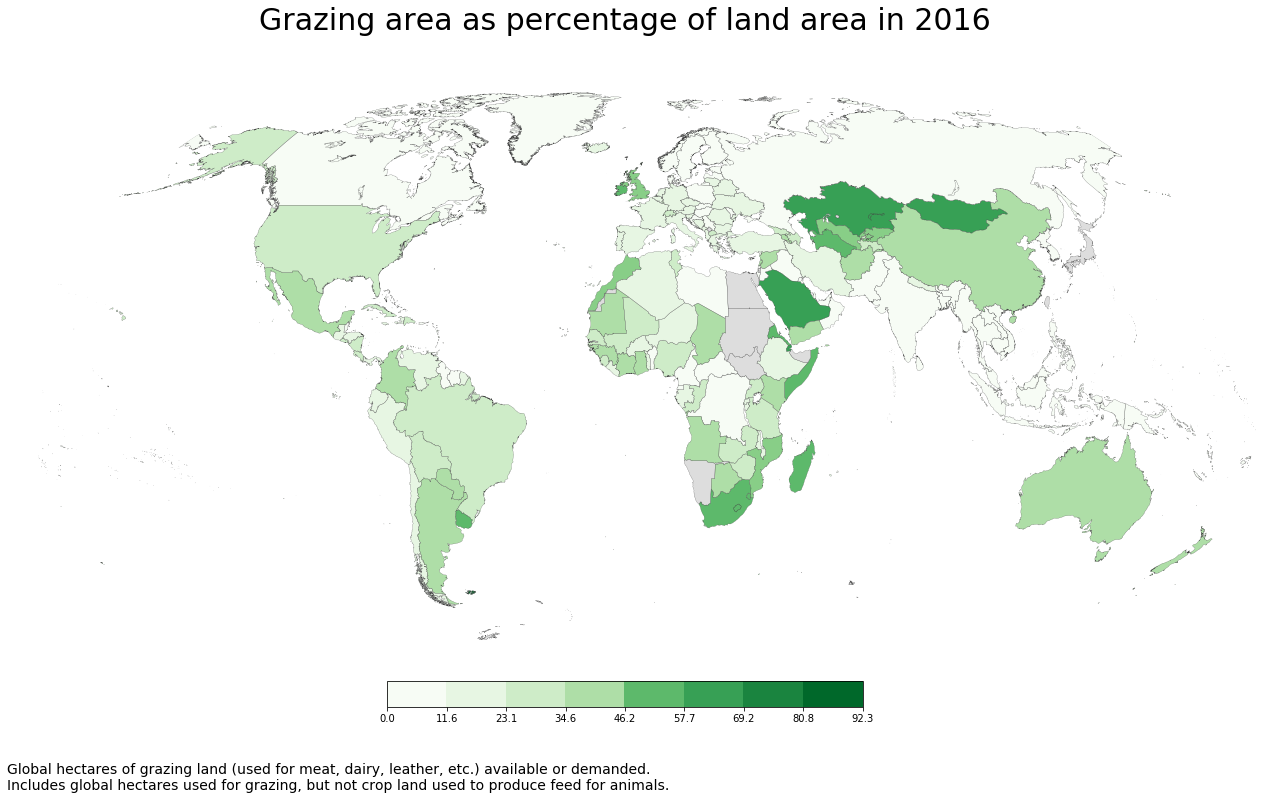

In [15]:
# Plot base world map
fig = plt.figure(figsize=(22, 12))

ax = fig.add_subplot(111, axisbg='w', frame_on=False)
fig.suptitle('Grazing area as percentage of land area in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

m.readshapefile(shapefile, 'units', color='#444444', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in map_df.index:
        color = '#dddddd'
    else:
        color = scheme[map_df.ix[iso3]['bin']]
    
    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)
    
# Cover up Antarctica so legend can be placed over it.
ax.axhspan(0, 1000 * 1800, facecolor='w', edgecolor='w', zorder=2)

# Draw color legend.
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

# Set the map footer.
plt.annotate(description, xy=(-.8, -3.2), size=14, xycoords='axes fraction')

plt.savefig(imgfile, bbox_inches='tight', pad_inches=.2)